<a href="https://colab.research.google.com/github/theresajamie/PRODIGY_DS_TASK3/blob/main/PRODIGY_DS_TASK3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install six


In [ ]:
import numpy as np
import pandas as pd
import six
import sys
sys.modules['sklearn.externals.six']=six
from sklearn import metrics

In [ ]:
path='/content/drive/MyDrive/dataset/banking.csv'
df = pd.read_csv(path)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


In [ ]:
from sklearn import preprocessing
string_to_int=preprocessing.LabelEncoder()
df=df.apply(string_to_int.fit_transform)
df


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,27,1,1,0,1,2,0,0,1,2,...,0,26,0,1,9,13,17,307,10,0
1,36,9,1,7,0,0,0,0,7,0,...,0,26,0,1,7,11,7,267,9,0
2,11,4,2,6,0,2,0,0,4,2,...,2,6,2,2,4,20,13,59,1,1
3,22,7,1,3,0,0,0,0,0,0,...,1,26,0,1,3,10,3,221,6,0
4,38,5,1,0,0,2,0,0,1,0,...,0,3,1,2,2,0,22,116,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,42,5,1,3,1,0,2,1,4,2,...,0,26,0,1,9,23,8,293,10,0
41184,14,3,1,0,1,0,0,1,6,2,...,1,26,0,1,8,18,16,290,8,0
41185,25,0,2,6,1,2,2,1,6,4,...,2,26,0,1,8,18,16,287,8,0
41186,31,9,1,5,0,0,2,1,8,3,...,1,26,0,1,0,2,25,69,3,0


In [ ]:
feature_cols=['marital','education','loan']
X =df[feature_cols]
y = df.y


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.30)


from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier(criterion="entropy",random_state=100)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=100)

In [ ]:
y_pred =classifier.predict(X_test)


data_p=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
data_p

,Actual,Predicted
15530,0,0
5024,0,0
39372,0,0
35850,0,0
1693,0,0
...,...,...
25794,1,0
24513,0,0
13366,0,0
1177,0,0


In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.8897790725904345


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[10995     0]
 [ 1362     0]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     10995
           1       0.00      0.00      0.00      1362

    accuracy                           0.89     12357
   macro avg       0.44      0.50      0.47     12357
weighted avg       0.79      0.89      0.84     12357



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


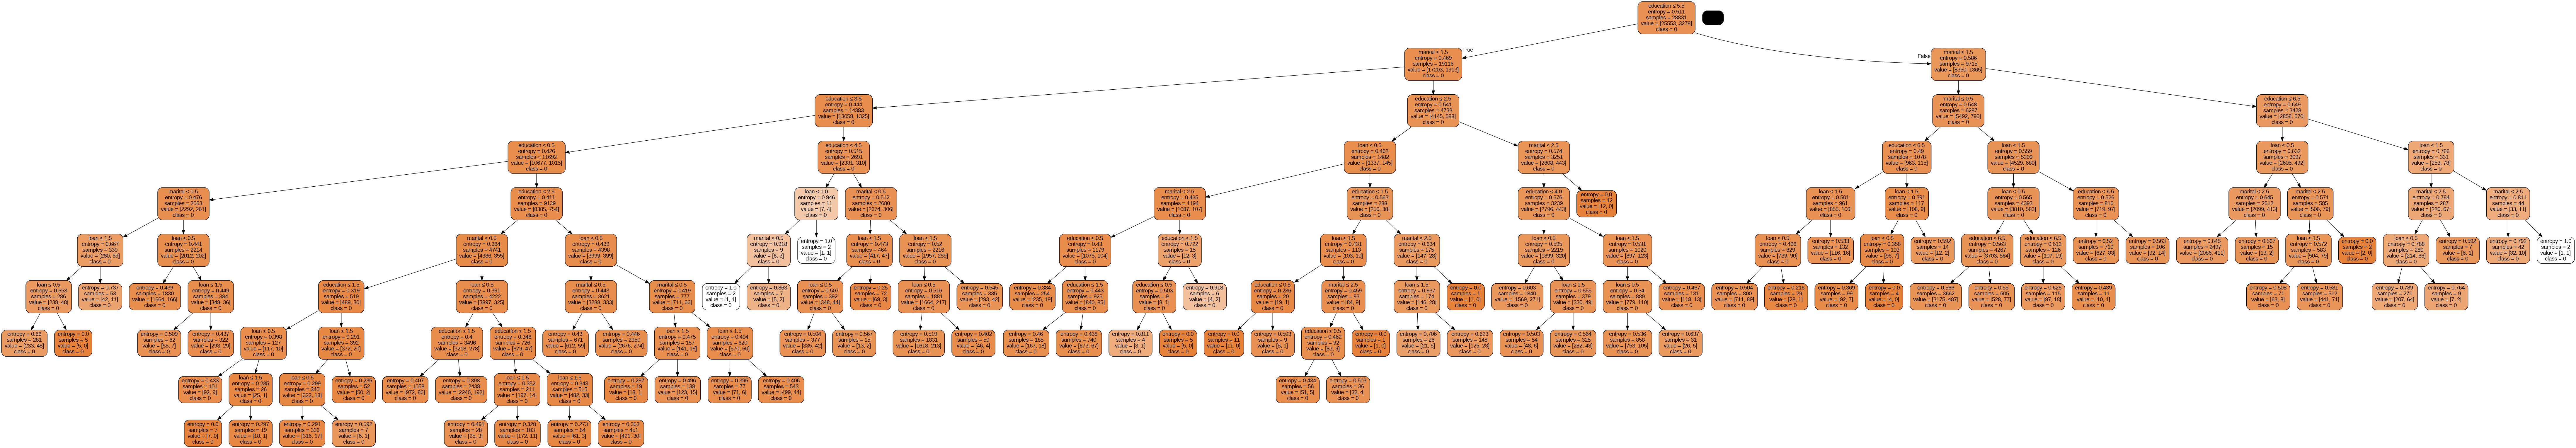

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
dot_data=StringIO()
export_graphviz(classifier, out_file=dot_data,
filled=True, rounded=True,
special_characters=True,feature_names =feature_cols,class_names=['0','1'])
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('bank.png')
Image(graph.create_png())